<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1 style="text-align:left;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#114477,#114477,#000);box-shadow:0 0 0px #333;">Jonathan M Clark</h1>

> **Date Completed:** 2023-01-06

# **Space X  Falcon 9 First Stage Landing Prediction**
## Launch Sites Locations Analysis with Folium

Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#992200,#000);box-shadow:0 0 0px #333;">Objectives</h3>

* Mark all launch sites on a map
* Mark the success/failed launches for each site on the map
* Calculate the distances between a launch site to its proximities

<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Import Libraries</h3>

In [1]:
!pip3 install folium
!pip3 install wget
print("Installation complete.")

Installation complete.


In [2]:
import folium
import wget
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
print("All libraries have been imported.")

All libraries have been imported.


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#0099bb,#000);box-shadow:0 0 0px #333;">Start Here</h3>

<h3 style="width:15%;padding:4px 16px 4px 32px;border-radius:4px;color:#fff;margin-top:6px;background:linear-gradient(90deg,#ff5500,#551100,#ff5500);box-shadow:0 0 0px #333;text-align:center;">Task 1</h3>

### Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">DataFrame</h3>

In [3]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df = pd.read_csv(spacex_csv_file)
spacex_df.head(2)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356


Now, you can take a look at what are the coordinates for each site.


In [4]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Simple Map</h3>

> **Note** <br>
> Plot launch sites on map using CIRCLES (with POPUPS) and MARKERS

In [5]:
# Create lists of coordinates, names and colors
launch_site_map_coordinates = launch_sites_df[['Lat', 'Long']].values.tolist()
launch_site_map_location_names = list(launch_sites_df['Launch Site'])
launch_site_map_circle_colors = ['#ff8800', '#007799', '#55dd00', '#aa00aa']

In [6]:
# Start location is NASA Johnson Space Center
nasa_coordinates = [29.559684888503615, -95.0830971930759]
launch_site_map = folium.Map(location=nasa_coordinates, zoom_start=11, height='100%', width='100%')
launch_site_map

In [7]:
# Create a blue circle at NASA Johnson Space Center's coordinate
circle = folium.Circle(nasa_coordinates, radius=1000, color='#0055dd', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
launch_site_map.add_child(circle)

# MARKER - Create an icon showing an abbreviation of the name 'NASA Johnson Space Center'
marker = folium.map.Marker(nasa_coordinates, icon=DivIcon(icon_size=(10,10),
                                                         icon_anchor=(-20,0),
                                                         html='<div style="font-size: 16px; color:#000;"><b>%s</b></div>' % 'NASA_JSC'
                                                        )
    )
launch_site_map.add_child(marker)

<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Mark Launch Sites with Circles</h3>

In [8]:
# Create circles at launch site locations with popup labels
for index,i in enumerate(launch_site_map_coordinates):
    # Set Variables
    circle_coordinates = i
    circle_popup_name = launch_site_map_location_names[index]
    circle_color = launch_site_map_circle_colors[index]

    # Add Circle
    circle = folium.Circle(circle_coordinates, radius=50, color=circle_color, fill=True).add_child(folium.Popup(circle_popup_name))
    launch_site_map.add_child(circle)

    # Add Marker
    marker_name = launch_site_map_location_names[index]
    marker = folium.map.Marker(circle_coordinates, icon=DivIcon(icon_size=(10,10),
                                                                icon_anchor=(-20,0),
                                                                html=f'<div style="font-size:16px; color:#000; width:200px;">{marker_name}</div>'
                                                               )
    )
    launch_site_map.add_child(marker)

launch_site_map

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


The generated map with marked launch sites should look similar to the following:<br>

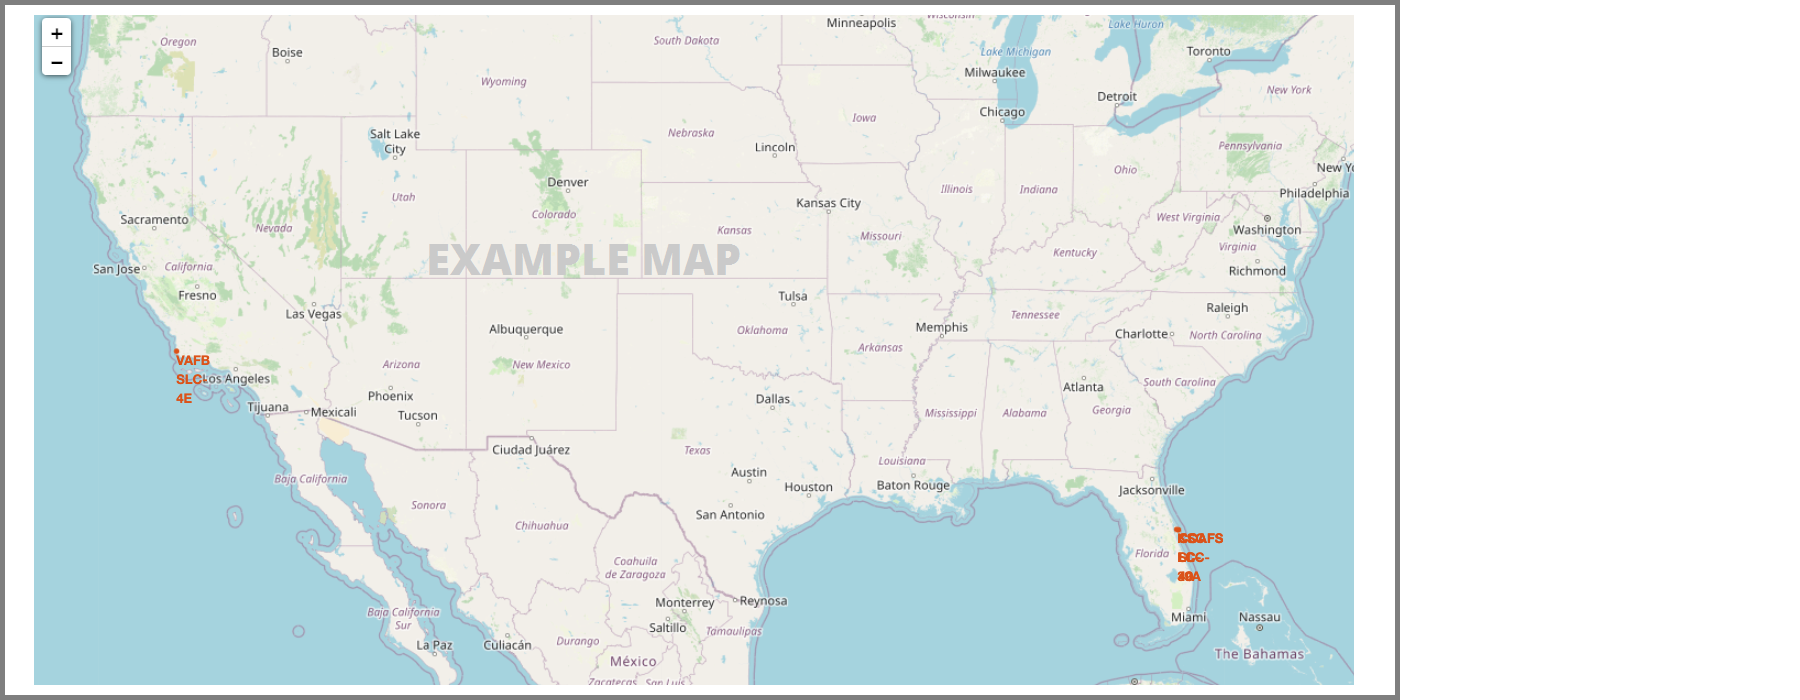

<!--<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png" />
</center>-->


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


<h3 style="width:15%;padding:4px 16px 4px 32px;border-radius:4px;color:#fff;margin-top:6px;background:linear-gradient(90deg,#ff5500,#551100,#ff5500);box-shadow:0 0 0px #333;text-align:center;">Task 2</h3>

### Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


Your updated map may look like the following screenshots: <br>
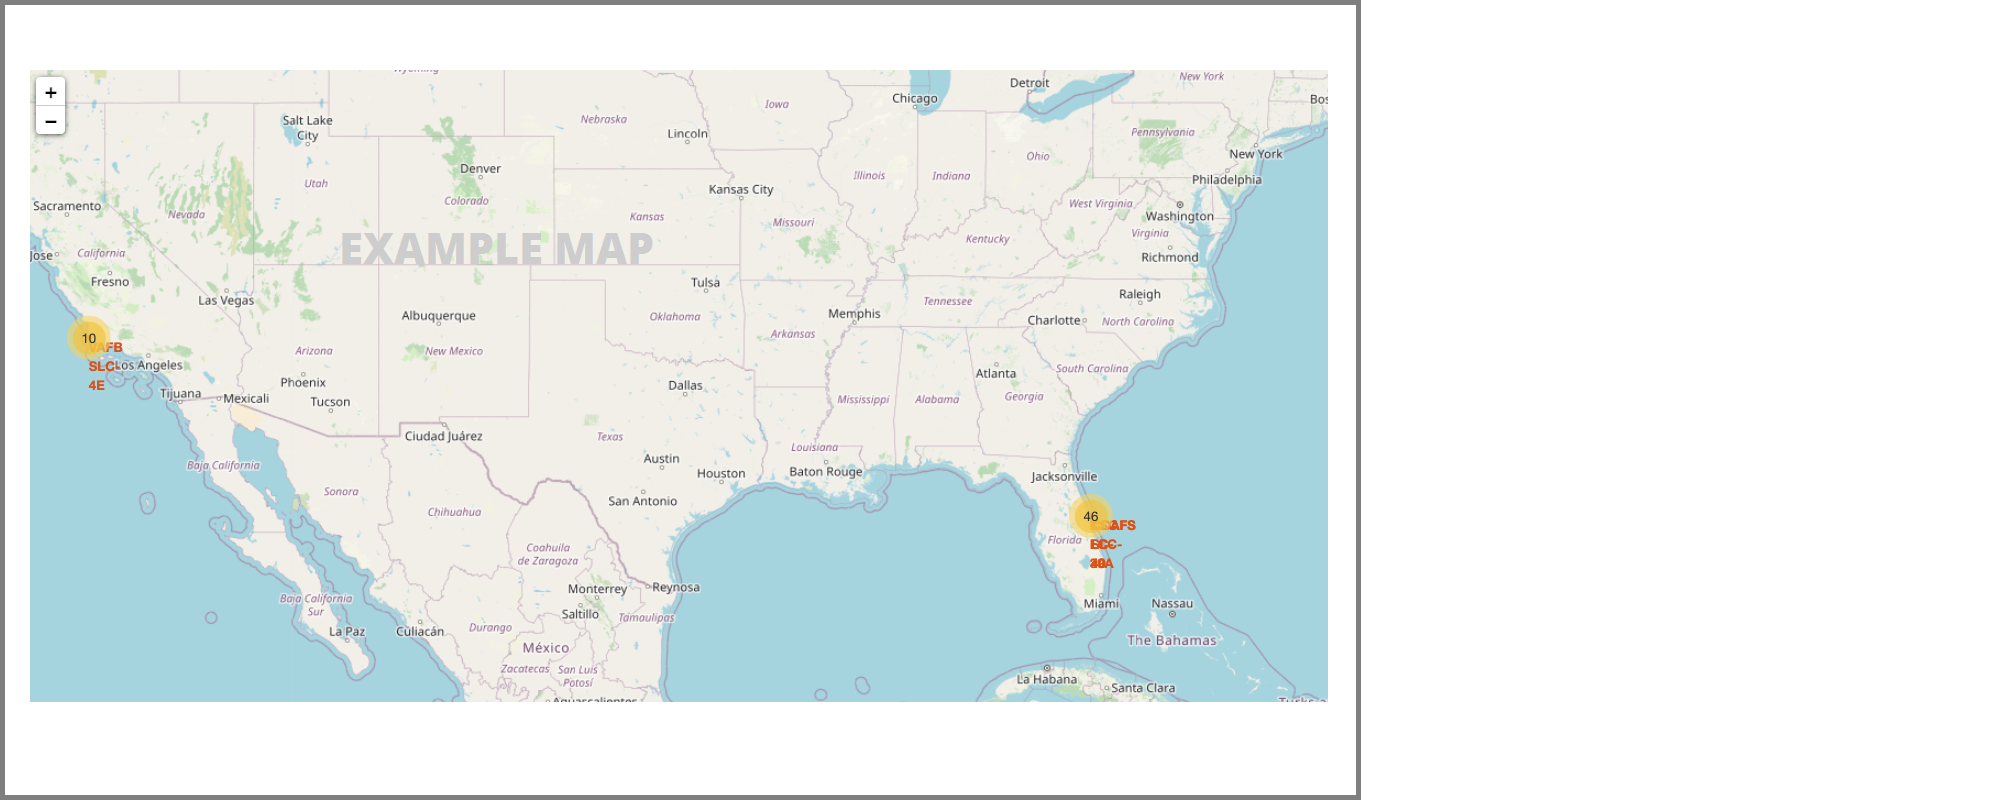
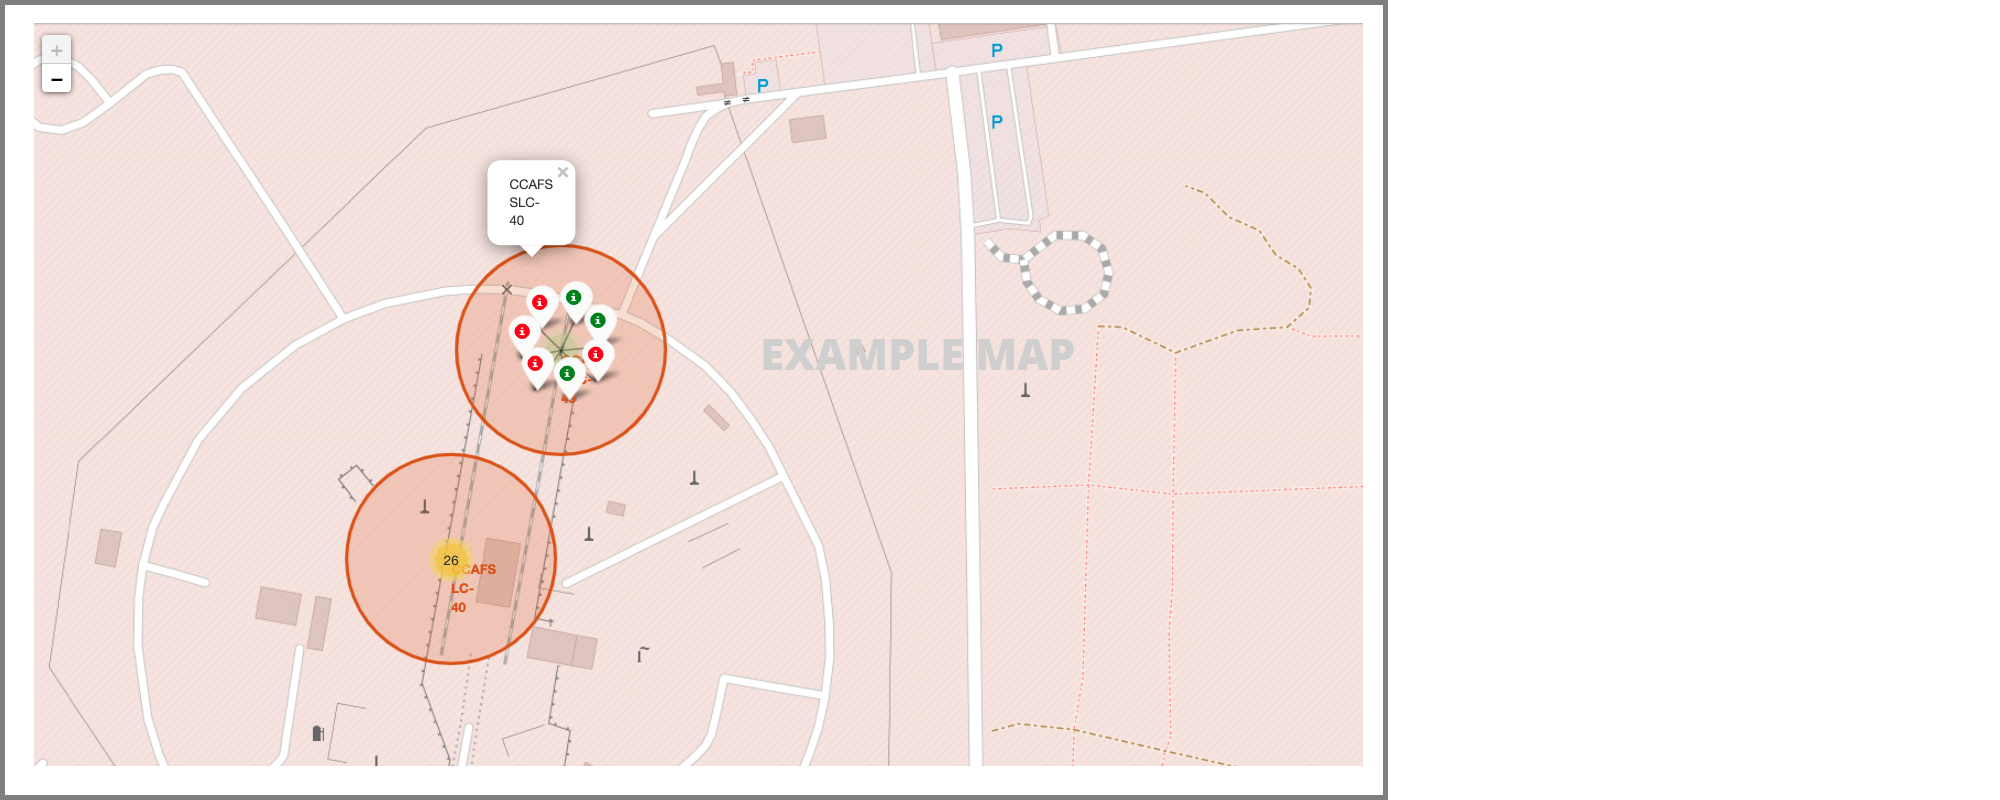

<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Mark Successes and Failures</h3>

In [9]:
# View the dataframe
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [10]:
# Create MarkerCluster using plugins method for adding success/failure markers to the map
from folium import plugins

# Start  with a clean copy of the map
launch_site_map_for_marker_cluster = folium.Map(location=nasa_coordinates, zoom_start=11, height='100%', width='80%')

# Create a marker cluster object for the marker_color category in the dataframe
marker_cluster = plugins.MarkerCluster().add_to(launch_site_map_for_marker_cluster)

# Create dictionaries and lists for use in the for loop
class_list = list(spacex_df['class'])
outcome_dict = {0:'Failure',1:'Success'}
colors_dict = {0:'#990000',1:'#00aa00'}

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(spacex_df.Lat, spacex_df.Long, class_list):
    html_label = f'<div style="padding:0 4px; border-radius:4px; font-size:16px; color:#fff; background:{colors_dict[label]};">{outcome_dict[label]}</div>'
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=html_label,
    ).add_to(marker_cluster)

# Show map
launch_site_map_for_marker_cluster

<!--<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png" />
</center>-->

<!--<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png" />
</center>-->

From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


<h3 style="width:15%;padding:4px 16px 4px 32px;border-radius:4px;color:#fff;margin-top:6px;background:linear-gradient(90deg,#ff5500,#551100,#ff5500);box-shadow:0 0 0px #333;text-align:center;">Task 3</h3>

### TASK 3: Calculate the distances from a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Add Mouse Position</h3>

In [11]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

launch_site_map.add_child(mouse_position)
launch_site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Mark Distances</h3>

In [12]:
# Function for calculating distance
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [13]:
# CCAFS LC-40 Launch Site Coordinates
launch_site_lat = 28.562302
launch_site_lon = -80.577356

In [14]:
# Coordinates of the closet COASTLINE
coastline_lat = 28.56321
coastline_lon = -80.56801
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(f'Distance to Coastline: {round(distance_coastline,2)} km')

# Create and add a folium.Marker on the selected point on the map
distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(100,-10),
        html=f'<div style="font-size:12px; color:#222; font-weight:bold; width:200px;">Coastline {round(distance_coastline,2)} km</div>',
        )
    ).add_to(launch_site_map)

Distance to Coastline: 0.92 km


In [15]:
# Coordinates of the closet RAIL LINE
rail_line_lat = 28.57209
rail_line_lon = -80.58520
distance_rail_line = calculate_distance(launch_site_lat, launch_site_lon, rail_line_lat, rail_line_lon)
print(f'Distance to Rail Line: {round(distance_rail_line,2)} km')

# Create and add a folium.Marker on the selected point on the map
distance_marker = folium.Marker(
    [rail_line_lat, rail_line_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(-40,-20),
        html=f'<div style="font-size:12px; color:#222; font-weight:bold; width:200px;">Rail Line {round(distance_rail_line,2)} km</div>',
        )
    ).add_to(launch_site_map)

Distance to Rail Line: 1.33 km


In [16]:
# Coordinates of a point on the ROAD circling the launch site
road_lat = 28.561695
road_lon = -80.575553
distance_road = calculate_distance(launch_site_lat, launch_site_lon, road_lat, road_lon)
print(f'Distance to Road: {round(distance_road,2)} km')

# Create and add a folium.Marker on the selected point on the map
distance_marker = folium.Marker(
    [road_lat, road_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(10,0),
        html=f'<div style="font-size:12px; color:#222; font-weight:bold; width:160px;">Perimeter Road {round(distance_road,2)} km</div>',
        )
    ).add_to(launch_site_map)

Distance to Road: 0.19 km


### Add Lines to Map
*TODO:* Draw a `PolyLine` between a launch site to the selected points

In [17]:
# Create a `folium.PolyLine` object using the coordinates
coastline_coordinates = [(launch_site_lat, launch_site_lon), (coastline_lat, coastline_lon)]
rail_line_coordinates = [(launch_site_lat, launch_site_lon), (rail_line_lat, rail_line_lon)]
road_coordinates = [(launch_site_lat, launch_site_lon), (road_lat, road_lon)]

coastline_line = folium.PolyLine(locations=coastline_coordinates, weight=2, color=launch_site_map_circle_colors[0])
rail_line_line = folium.PolyLine(locations=rail_line_coordinates, weight=2, color=launch_site_map_circle_colors[0])
road_line = folium.PolyLine(locations=road_coordinates, weight=2, color=launch_site_map_circle_colors[0])

launch_site_map.add_child(coastline_line)
launch_site_map.add_child(rail_line_line)
launch_site_map.add_child(road_line)

Your updated map with distance line should look like the following screenshot:<br>
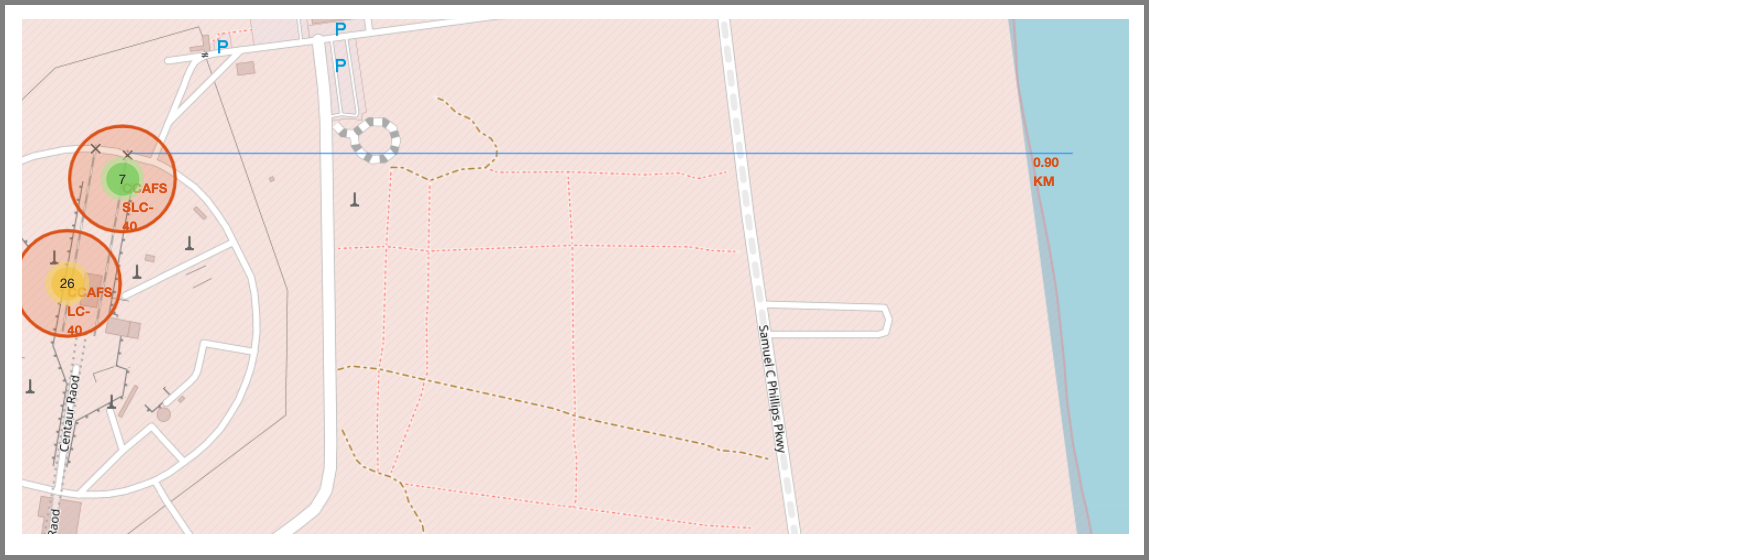

<!--<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png" />
</center>-->

*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png" />
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png" />
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png" />
</center>


After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


<h3 style="width:15%;padding:4px 16px 4px 32px;border-radius:4px;color:#fff;margin-top:6px;background:linear-gradient(90deg,#ff5500,#551100,#ff5500);box-shadow:0 0 0px #333;text-align:center;">Next Steps</h3>

### Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#009922,#000);box-shadow:0 0 0px #333;">Create Dashboard with Plotly Dash</h3>

> **Python File Code:** <br>
> 2022-12-17 <br>
> JonathanMClark_spacex_dash_app.py

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

def assign_launch_outcome(launch_outcome):
    if launch_outcome == 1:
        return 'success'
    else:
        return 'failure'
    
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                html.Br(),

                                # _____ DROPDOWN SELECTOR _____
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(
                                    id='site-dropdown',
                                    options=[
                                        {'label': 'All Sites', 'value': 'ALL'},
                                        {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                        {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                        {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                        {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}
                                    ],
                                    value='ALL',
                                    placeholder="Select a Launch Site here",
                                    searchable=True
                                ),
                                html.Br(),

                                # _____ PIE CHART _____
                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                # _____ RANGE SLIDER _____
                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(
                                    id='payload-slider',
                                    min=0,
                                    max=10000,
                                    step=1000,
                                    marks={0:'0', 2500:'2500', 5000:'5000', 7500:'7500', 10000:'10000'},
                                    value=[min_payload, max_payload]
                                ),

                                # _____ SCATTER CHART _____
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
            ])

# _____ PIE CHART - CALLBACK FUNCTION _____
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(  Output(component_id='success-pie-chart', component_property='figure'),
                Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df.loc[spacex_df['Launch Site'] == entered_site]
    total_launch_count = filtered_df['class'].count()
    successful_launch_count = filtered_df['class'].sum()
    failed_launch_count = total_launch_count - successful_launch_count
    dict_test = {'names':[0,1], 'values':[failed_launch_count,successful_launch_count]}
    new_df = pd.DataFrame(dict_test)
    values = list(new_df['values'])
    names = list(new_df['names'])
    title = f'Total Success Launches for site {entered_site} '
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Success Launches By Site')
        return fig
    else:
        fig = px.pie(filtered_df, values=values, names=names, title=title)
        return fig

# _____ SCATTERPLOT - CALLBACK FUNCTION _____
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(  Output(component_id='success-payload-scatter-chart', component_property='figure'),
                Input(component_id='site-dropdown', component_property='value'),
                Input(component_id='payload-slider', component_property='value'))

def get_scatter_plot(entered_site, slider_range_list):
    min_value = slider_range_list[0]
    max_value = slider_range_list[1]
    filtered_df = spacex_df.loc[(spacex_df['Launch Site'] == entered_site) & (spacex_df['Payload Mass (kg)'] >= min_value) & (spacex_df['Payload Mass (kg)'] <= max_value)]
    title = f'Correlation between Payload and Success for {entered_site} '
    if entered_site == 'ALL':
        fig = px.scatter(spacex_df, x='Payload Mass (kg)', y='class', color='Booster Version Category', title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category', title=title)
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()


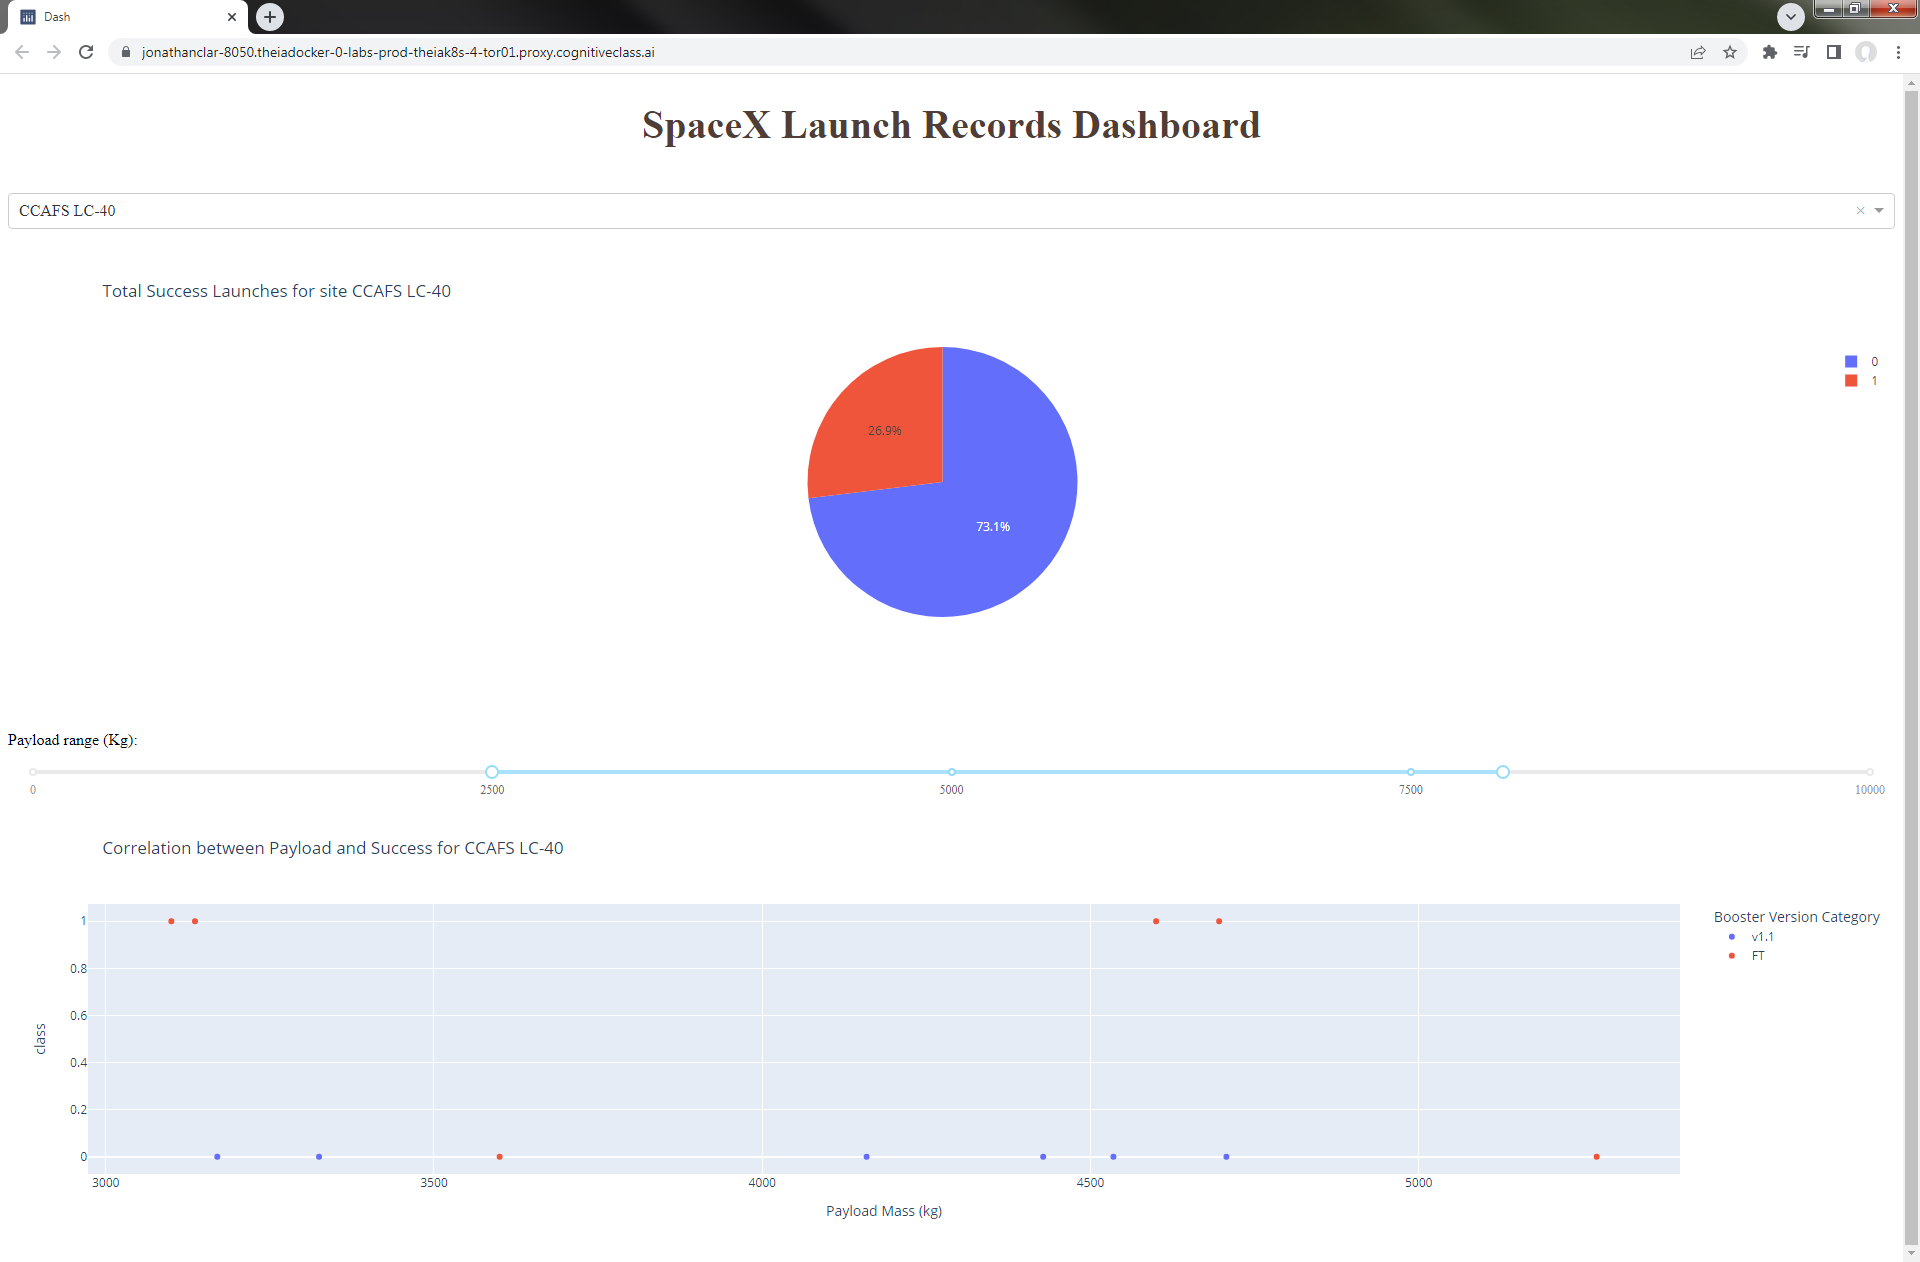

<h3 style="width:50%;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#0099bb,#000);box-shadow:0 0 0px #333;">End Here</h3>

<h3 style="width:100%;padding:12px;border-radius:4px;color:#fff;margin-top:256px;background:linear-gradient(90deg,#999,#333);box-shadow:0 0 0px #333;">Other Info</h3>

## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description          |
| ----------------- | ------- | ---------- | --------------------------- |
| 2021-05-26        | 1.0     | Yan        | Created the initial version |


Copyright © 2021 IBM Corporation. All rights reserved.
